In [1]:
using DelimitedFiles
using Plots
using LaTeXStrings
using Printf

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


In [2]:
using DataFrames, CSV

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [5]:
IAPGfgcalls = reshape(readdlm("IAPGfgcalls.txt", Int), (10,8))

10×8 Array{Int64,2}:
  52   211   414   737  1203   2919   6468  11408
 160   738  2104  3829  5940   9471  10581  14087
 330  1533  2699  5430  7012   8744  12948  12437
 624  1508  3127  5147  9331   9164  11215  14689
 676  1741  3136  5440  7133  10852  11574  16092
 784  1738  3361  5828  7549  12647  13455  18385
 817  1816  4013  6439  7455  12607  15117  18666
 857  1977  4156  6974  8618   9818  15366  13242
 887  1813  4855  7543  8562  10843  15936  14950
 922  2044  4742  7490  9962  10698  17285  16054

In [6]:
IRfgcalls = reshape(readdlm("IRfgcalls.txt", Int), (10,8))

10×8 Array{Int64,2}:
  45  129  241  333   513   709   979  1286
 102  333  620  783   934  1085  1251  1421
 169  462  621  778   924  1089  1217  1347
 261  475  662  803   994  1132  1424  1573
 269  478  640  806  1072  1263  1380  1639
 296  477  644  881  1117  1282  1524  1700
 300  498  648  919  1093  1333  1511  1747
 304  505  685  945  1173  1368  1540  1805
 310  512  703  947  1146  1388  1624  1840
 320  520  734  971  1227  1439  1661  1884

In [13]:
IERfgcalls = reshape(readdlm("IERfgcalls.txt", Int), (10,8))

10×8 Array{Int64,2}:
 155   234   403   450   667  1102  1859   3108
 229   692  1421  2050  2429  3109  3394   3697
 360  1099  1573  1790  2716  4896  6842   6835
 600  1201  1447  2503  5697  6461  5549   7783
 617  1165  1825  3715  4672  5335  6919   7028
 709  1207  2858  4632  4781  5446  7032   9012
 827  1122  3674  4075  6730  7079  8809   9210
 860  1422  3672  3701  5664  5087  8837   8011
 871  1711  4022  3944  4724  4203  9432  10180
 729  1638  4223  3459  3796  5726  9716  11607

In [7]:
X = IAPGfgcalls - IRfgcalls

10×8 Array{Int64,2}:
   7    82   173   404   690   2210   5489  10122
  58   405  1484  3046  5006   8386   9330  12666
 161  1071  2078  4652  6088   7655  11731  11090
 363  1033  2465  4344  8337   8032   9791  13116
 407  1263  2496  4634  6061   9589  10194  14453
 488  1261  2717  4947  6432  11365  11931  16685
 517  1318  3365  5520  6362  11274  13606  16919
 553  1472  3471  6029  7445   8450  13826  11437
 577  1301  4152  6596  7416   9455  14312  13110
 602  1524  4008  6519  8735   9259  15624  14170

In [8]:
extrema(X)

(7, 16919)

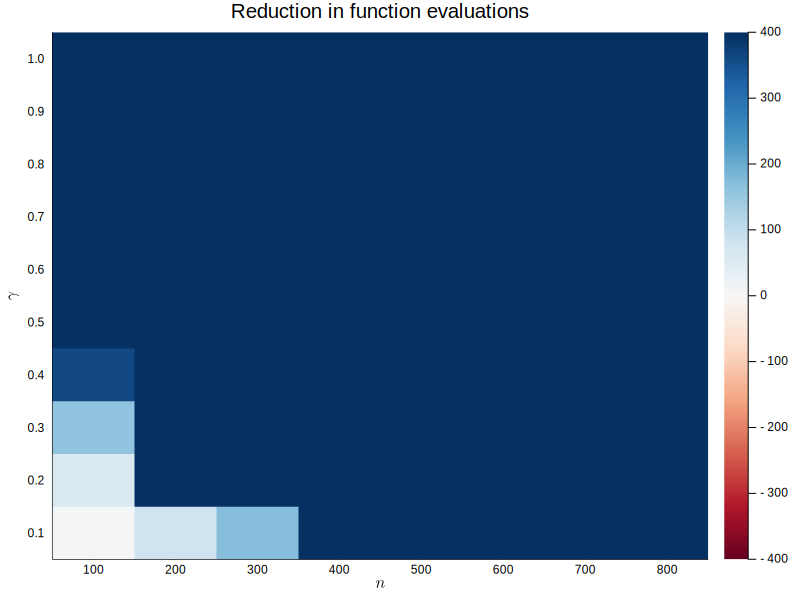

In [10]:
ns = [string(n) for n=100:100:800]
γs = [@sprintf("%.1f", γ) for γ=0.1:0.1:1.0]
plt = heatmap(ns, γs, IAPGfgcalls - IRfgcalls, 
    size=(800, 600),
    #aspect_ratio=1.0,
    xlabel=L"n",
    ylabel=L"\gamma",
    title="Reduction in function evaluations",
    c=:RdBu,
    clims=(-400, 400),
)

In [27]:
savefig(plt, "figs/heatmap.png")

In [ ]:
clibraries()

In [ ]:
showlibrary(:colorbrewer)

In [ ]:
for colorlib in clibraries()
    println(colorlib)
    display(showlibrary(colorlib))
end

---

In [11]:
using BenchmarkProfiles

┌ Info: Precompiling BenchmarkProfiles [ecbce9bc-3e5e-569d-9e29-55181f61f8d0]
└ @ Base loading.jl:1273


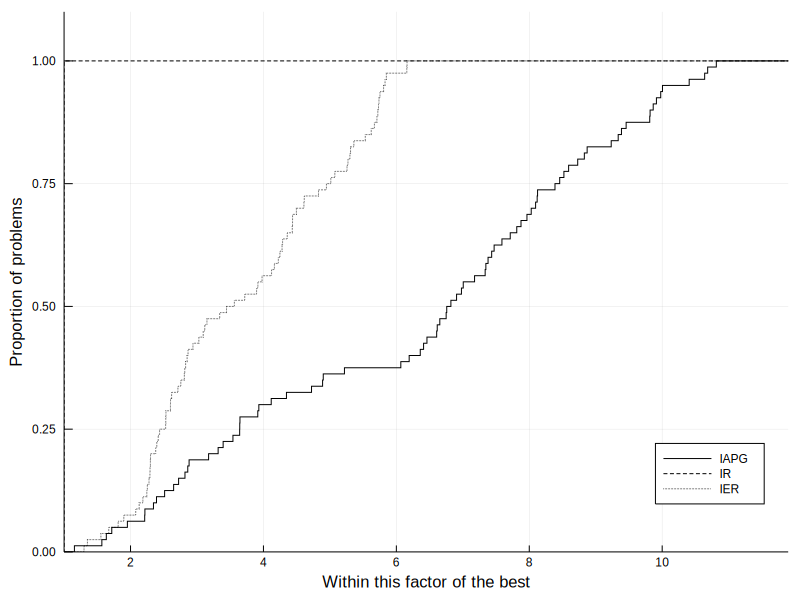

In [14]:
T = [IAPGfgcalls[:] IRfgcalls[:] IERfgcalls[:]]
solvernames = ["IAPG", "IR", "IER"]

plt = performance_profile(T, solvernames, logscale=false, 
    size=(800, 600),
    legend=:bottomright, 
    style=:auto,
    linecolor=:black)

In [15]:
savefig(plt, "figs/performance_profile.pdf")